In [1]:
pip install tensorflow


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# Load dataset CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalisasi data (0-255 menjadi 0-1)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encoding label
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Informasi dataset
print(f"Training data: {X_train.shape}, Test data: {X_test.shape}")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training data: (50000, 32, 32, 3), Test data: (10000, 32, 32, 3)


In [4]:
# Membangun model
model = Sequential()

# Layer Convolutional
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

# Flatten layer
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Kompilasi model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Ringkasan model
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Training model
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(X_test, y_test))


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 88ms/step - accuracy: 0.2485 - loss: 1.9931 - val_accuracy: 0.4736 - val_loss: 1.4434
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 87ms/step - accuracy: 0.4631 - loss: 1.4861 - val_accuracy: 0.5499 - val_loss: 1.2596
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 87ms/step - accuracy: 0.5222 - loss: 1.3319 - val_accuracy: 0.5944 - val_loss: 1.1283
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 86ms/step - accuracy: 0.5669 - loss: 1.2181 - val_accuracy: 0.6149 - val_loss: 1.0746
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 87ms/step - accuracy: 0.5912 - loss: 1.1615 - val_accuracy: 0.6166 - val_loss: 1.0889
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 86ms/step - accuracy: 0.6178 - loss: 1.0914 - val_accuracy: 0.6297 - val_loss: 1.0487
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 86ms/step - accuracy: 0.6381 - loss: 1.0368 - val_accuracy: 0.6688 - val_loss: 0.9498
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 87ms/step - accuracy: 0.6532 - loss: 0.9908 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6853 - loss: 0.8899
Test Accuracy: 68.23%


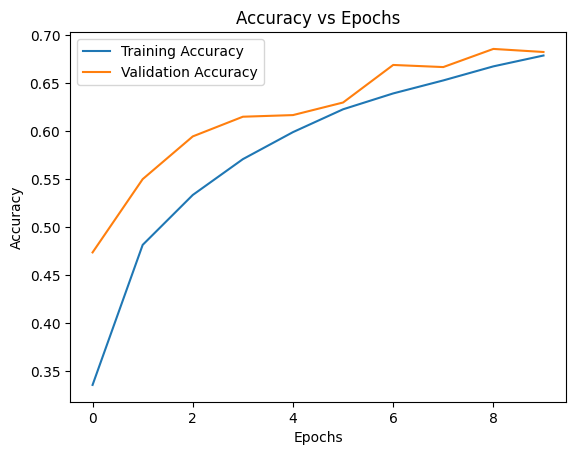

In [6]:
# Evaluasi model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Visualisasi training dan validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs Epochs')
plt.show()


In [8]:
# Menyimpan model ke file
model.save('cifar10_model.h5')


In [10]:
# Informasi dataset
print("Informasi Dataset:")
print(f"Dimensi data training: {X_train.shape}")
print(f"Dimensi data test: {X_test.shape}")
print(f"Jumlah label unik: {len(set(y_train.flatten()))}")
print(f"Dimensi satu gambar (fitur per gambar): {X_train.shape[1:]}")
print(f"Jumlah fitur per gambar: {X_train.shape[1] * X_train.shape[2] * X_train.shape[3]}")
print(f"Contoh label unik: {set(y_train.flatten())}")

# Menampilkan 5 contoh data pertama
print("\nContoh data pertama:")
for i in range(5):
    print(f"Gambar {i+1}: Label {y_train[i][0]}")

Informasi Dataset:
Dimensi data training: (50000, 32, 32, 3)
Dimensi data test: (10000, 32, 32, 3)
Jumlah label unik: 10
Dimensi satu gambar (fitur per gambar): (32, 32, 3)
Jumlah fitur per gambar: 3072
Contoh label unik: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

Contoh data pertama:
Gambar 1: Label 6
Gambar 2: Label 9
Gambar 3: Label 9
Gambar 4: Label 4
Gambar 5: Label 1
